<a href="https://colab.research.google.com/github/aku019/Analytics-ML-DL-Learning/blob/main/loan4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


    Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y

[5 rows x 13 columns]


Column Names




Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

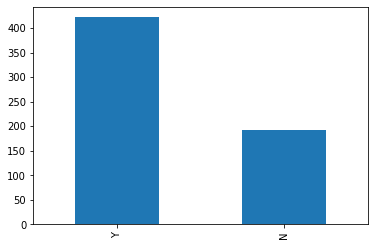

In [ ]:
'''
LOAN DATASET
'''

# required libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt


# read the dataset
#data = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv("/gdrive/My Drive/titanic_1/test_lAUu6dG.csv")
train = pd.read_csv("/gdrive/My Drive/titanic_1/train_ctrUa4K.csv")
print(train.head())

print('\n\nColumn Names\n\n')
test_original=test






#label encode the target variable
train['Loan_Status'].value_counts().plot.bar()
train.columns

In [ ]:
df=train

In [ ]:
df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].str.rstrip('+')
df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(np.int)
df['Married'] = df['Married'].map({'No':0, 'Yes':1}).astype(np.int)
df['Education'] = df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
df['Dependents'] = df['Dependents'].astype(np.int)

In [ ]:
dtest=test
dtest['Gender'] = dtest['Gender'].map({'Female':0,'Male':1})
dtest['Married'] = dtest['Married'].map({'No':0, 'Yes':1}).astype(np.int)
dtest['Education'] = dtest['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
dtest['Self_Employed'] = dtest['Self_Employed'].map({'No':0, 'Yes':1})
dtest['Dependents'] = dtest['Dependents'].str.rstrip('+')
dtest['Gender'] = dtest['Gender'].fillna( dtest['Gender'].dropna().mode().values[0]).astype(np.int)
dtest['Dependents'] = dtest['Dependents'].fillna( dtest['Dependents'].dropna().mode().values[0]).astype(np.int)
dtest['Self_Employed'] = dtest['Self_Employed'].fillna( dtest['Self_Employed'].dropna().mode().values[0])
dtest['LoanAmount'] = dtest['LoanAmount'].fillna( dtest['LoanAmount'].dropna().mode().values[0])
dtest['Loan_Amount_Term'] = dtest['Loan_Amount_Term'].fillna( dtest['Loan_Amount_Term'].dropna().mode().values[0])
dtest['Credit_History'] = dtest['Credit_History'].fillna( dtest['Credit_History'].dropna().mode().values[0] )

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df=train
dtest=test

In [ ]:
X,y  = df.iloc[:, 1:-1], df.iloc[:, -1]


In [ ]:
X= pd.get_dummies(X)


In [ ]:
from sklearn.preprocessing import StandardScaler
slc= StandardScaler()
X_train_std = slc.fit_transform(X)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators =500, criterion='entropy', oob_score=True, random_state=1,n_jobs=-1)

In [ ]:
from xgboost.sklearn import XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)

In [ ]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('forest', forest), ('xgb', xgb1), ('adaboost', ada)], voting='hard')

In [ ]:
eclf.fit(X_train_std, y)


VotingClassifier(estimators=[('forest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
 

In [ ]:
dtest.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0.0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,1,1,1,0.0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,1,2,1,0.0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,1,2,1,0.0,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,1,0,0,0,0.0,3276,0,78.0,360.0,1.0,Urban


In [ ]:
X_test = dtest.iloc[:,1:]

In [ ]:
X_test.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0.0,5720,0,110.0,360.0,1.0,Urban
1,1,1,1,1,0.0,3076,1500,126.0,360.0,1.0,Urban
2,1,1,2,1,0.0,5000,1800,208.0,360.0,1.0,Urban
3,1,1,2,1,0.0,2340,2546,100.0,360.0,1.0,Urban
4,1,0,0,0,0.0,3276,0,78.0,360.0,1.0,Urban


In [ ]:
X_test= pd.get_dummies(X_test)


In [ ]:
X_test.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,1,0.0,5720,0,110.0,360.0,1.0,0,0,1
1,1,1,1,1,0.0,3076,1500,126.0,360.0,1.0,0,0,1
2,1,1,2,1,0.0,5000,1800,208.0,360.0,1.0,0,0,1
3,1,1,2,1,0.0,2340,2546,100.0,360.0,1.0,0,0,1
4,1,0,0,0,0.0,3276,0,78.0,360.0,1.0,0,0,1


In [ ]:
X_test_std = slc.transform(X_test)


In [ ]:
y_test_pred = eclf.predict(X_test_std)


In [ ]:
dtest['Loan_Status'] = y_test_pred


In [ ]:
df_final = dtest.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'], axis=1)

In [ ]:
df_final['Loan_Status'] = df_final['Loan_Status'].map({0:'N', 1:'Y'})

In [ ]:
df_final.to_csv('my_submission.csv', index=False)

In [ ]:
from google.colab import files
files.download('my_submission.csv')

